## lets have an overview of the data set first.....

In [ ]:
import pandas as pd
filepath="/content/Students Social Media Addiction.csv"
data=pd.read_csv(filepath)
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

# lets build a Linear Regression model to predict "*Addicted_Score*" based on the other features.

Here’s the steps we will follow:


Step1: Drop Student_ID (not useful for prediction).

Step2: Encode categorical variables (Gender
Academic_Level, Country, etc.).

Step3: Split data into training and testing sets.

Step4: Train a Linear Regression model.

Step5: Evaluate using R² and Mean Squared Error (MSE).

Mean Squared Error (MSE): 0.107
R-squared (R2): 0.957


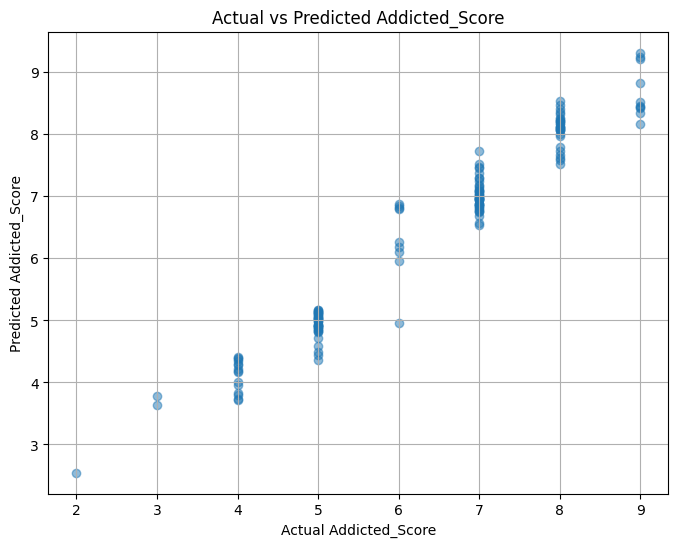

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Drop Student_ID
data = data.drop(columns=['Student_ID'])

# Encode categorical columns using LabelEncoder
categorical_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Features (X) and target (y)
X = data.drop(columns=['Addicted_Score'])
y = data['Addicted_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R2): {r2:.3f}")

# Visualize predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Addicted_Score")
plt.ylabel("Predicted Addicted_Score")
plt.title("Actual vs Predicted Addicted_Score")
plt.grid(True)
plt.show()

# **Conclusion**
The evaluation results for your Linear Regression model:

Mean Squared Error (MSE): 0.107

R² Score: **0.957** This means the model explains about 95.7% of the variance in Addicted_Score.